In [117]:
from dataclasses import dataclass,field
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import shapiro
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [118]:
df_prueba = pd.DataFrame({
"es_pepito":['s','n','n','s','n','s','n','s','n','s','s','n','s','s','n','s','s','n','n','n','n','s','s','s'],
"es_pepito2":['s','s','s','s','n','s','n','s',None,'s','s','n','s','s',None,'s','s','n','n','n',None,'s','s','s'],
"sexo":['h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h'],
"sexo_2":['h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h'],
"Datos_B":[np.random.randint(0,5) for _ in range(24)],
"Datos_C":[np.random.randint(0,1) for _ in range(24)],
"Datos_D": [np.random.randint(0,1000) for _ in range(24)],
"Datos_E": [np.random.randint(0,1000) for _ in range(24)],
"Datos_F": [np.random.randint(0,1000) for _ in range(24)],
"Datos_G": [np.random.randint(0,1000) for _ in range(24)],
"Datos_cate_A": ['Grupo '+str(np.random.randint(0,6)) for _ in range(24)],
"Datos_cate_B": ['Grupo '+str(np.random.randint(0,4)) for _ in range(24)],
"Datos_cate_C": ['Grupo '+str(np.random.randint(0,5)) for _ in range(24)],

})

In [119]:

class DF_exploracion(pd.DataFrame):

    def __init__(self, *args, **kw):
        super(DF_exploracion, self).__init__(*args, **kw)
        self.cuanti=pd.DataFrame
        self.cuali=pd.DataFrame
        self.dico=pd.DataFrame
        self.cate=pd.DataFrame
        self.dummy=pd.DataFrame
        self.df=pd.DataFrame


    def variables(self):

        dico=[]
        cuantis=[]
        categori=[]
        eliminar=[]

        # print("|----------------------------------------------------------------------------------------------------")
        for i in self.columns: 
            if len(self[i].dropna().unique())==2:
                tipo_de_var=f"{len(self[i].dropna().unique())} tipos, posiblemente: DICOTOMICA"
                dico.append(i)

            elif len(self[i].dropna().unique())>10:
                tipo_de_var=f"{len(self[i].dropna().unique())} tipos, posiblemente: CUANTITATIVA"
                cuantis.append(i)

            elif  len(self[i].dropna().unique())<2:
                tipo_de_var=f"SOLO {len(self[i].dropna().unique())} TIPOS, NO VALE LA COLUMNA"
                eliminar.append(i)
            else:
                tipo_de_var=f"{len(self[i].dropna().unique())} tipos, posiblemente: CATEGORICA/CUANTI"
                categori.append(i)

            print (f"|  {i} \n|   - Tipo de dato: {self[i].dtype} \n|   - Valores repetidos: {tipo_de_var} \n|   - Nulos: {self[i].isnull().sum()/len(self[i])} \n| ")

        print (f"|----------------------------------------------------------------------------------------------------\n|  TODAS: {self.columns} \n|  DICOTOMICAS: {dico} \n|  CATEGORICAS: {categori} \n|  CUANTITATIVAS: {cuantis} \n|  ELIMINAR: {eliminar}")
        print("|----------------------------------------------------------------------------------------------------")

        self.DF_cuantis(cuantis)
        self.DF_cualis(categori+dico)
        self.DF_dicotomica(dico)
        self.DF_categorica(categori)
        self.df=self
        
    def todas_col(self):
        return self.df
    
    def DF_cuantis(self,lista):
        self.cuanti=self[lista]
        
    def DF_cualis(self,lista):
        self.cuali=self[lista]
        
    def DF_dicotomica(self, lista):
        self.dico=self[lista]
        
    def DF_categorica(self, lista):
        self.cate=self[lista]   

    def limpiar_aux(self):
        
        try:
            df_nuevo=pd.DataFrame
            aux1=list(self.dico.columns)
            aux=[]
            df_nuevo=pd.get_dummies(self.df, columns=aux1)
            
            for columna in df_nuevo.columns:
                for variables in list(self.dico.columns):
                    if variables in columna:
                        aux.append(columna)
                    
            self.dummy=df_nuevo[aux]
            self[aux]=df_nuevo[aux]

            # self.df=self.drop(columns=var, axis='columns')
            self.df= self[self.columns.difference(self.dico.columns)]
            print("********************** self.dummy ************\n")
            print(self.dummy)
            print("\n********************** self.df o todas_las_col() ************\n")
            print(self.df)

        except:
            print("---------------------- ERROR -----------------")

    def limpiar_dummys(self):

        b=False
        lista=list(self.dico.columns)
        for ind, i in enumerate(lista):
                if (ind+1<len(lista)):
                    if( (i in lista [ind+1]) ):
                        b=True
                        break
        if b:
            nombres_nuevos=[]
            if len(lista)>2:
                for ind, i in enumerate(lista):
                    if (ind+1<len(lista)):
                        if( (i in lista [ind+1]) ):
                            nombres_nuevos.append(i.upper())
                        else:
                            nombres_nuevos.append(i)
                    else:
                        nombres_nuevos.append(i)
                        
            aux_df=self.df

            for i,j in zip(lista,nombres_nuevos):
                aux_df.rename(columns={i:j},inplace=True)
                
            self.df=aux_df
            self.dico.columns=nombres_nuevos
            self.limpiar_aux()
        else: 
            self.limpiar_aux()



    def estadistica_descriptiva_cuantis(self):

        print("----------------------------------------------------------------------------------------------------\nDESCRIPCIÓN")
        print (self.cuanti.describe())
        print("\n")
        print("----------------------------------------------------------------------------------------------------\nCUARTILES")
        print (self.cuanti.quantile([0.05,0.25,0.5,0.75,0.95]))
        print("\n")
        print("----------------------------------------------------------------------------------------------------\n")
        print("\n")
        print("----------------------------------------------------------------------------------------------------\n")


        aux1=self.dico.columns
        aux2=self.cate.columns
        aux=self.cuanti.columns

        # df_auxiliar = self.groupby('sexo').apply(lambda x: pd.Series(shapiro(x), index=['W','P'])).reset_index()
        # print(df_auxiliar)
                
        for a in list(aux1.values):
            
            for b in list(aux.values):
                
                print("++++++++++++++++++++++++++++  "+a+" y "+b+"  ++++++++++++++++++++++++++\n")
                agrupado=self.groupby(a)[b]
                titulo=f"Agrupado por {a} y por {b}"
                print(titulo)
                print(agrupado.describe().reset_index())
                # df.groupby(['cat1', 'cat2'])['purchases','sales'].apply(stats.shapiro)
                print("////////////////////////// TEST DE SHAPIRO ////////////////////////////")
                print(agrupado.apply(stats.shapiro))
                
                print("\n")
                print("----------------------------------------------------------------------------------------------------\n")


    def estadistica_descriptiva_cualis(self):

        print("\n--------------------- Variables dico ---------------------")
        print("\n")
        for i in self.dico.columns:
            print(f"...........Frecuencia variable {i} ....................")
            print(self[i].value_counts()/(self[i].count()))
            print("\n")

        print("\n-------------------- Variables categoricas --------------------")
        print("\n")
        for i in self.cate.columns:
            print(f"...........Frecuencia variable {i} ....................")
            print(self[i].value_counts()/(self[i].count()))
            print("\n")
        print("\n\n")

        # crosstab variables cualis con cate
        aux=list(self.cate.columns)

        a=0
        for i in aux:
            a=a+1
            if a<len(aux)/2:
                b=0
                for j in aux[:-1]:
                    b=b+1
                    if b > a:
                        print(f"*************** TABAL DE VARIABLES CATEGORICAS {i} y {j} *********************\n ")
                        tab = pd.crosstab (index=self[i], columns=self[j])
                        x=(tab/tab.sum())
                        print(tab)
                        print("\n")
                        print(f"/////////////////// EN PROPORCION //////////////////\n")
                        print(x)
                        print("\n\n")


    def anova(self):

        aux_cate=list(self.cate.columns)
        aux_cuati=list(self.cuanti.columns)

        for i in aux_cate:
            for j in aux_cuati:
                print(f"\n----------- ANOVA Categoria {i} y variable continua {j} ----------\n")
                model = ols(f"{j} ~ {i}", data=self).fit()
                a=sm.stats.anova_lm(model, typ=2)
                print(a)




    def Chi(self):

        aux_dico=list(self.dico.columns)

        if len(aux_dico)>1:
            for ind, i in enumerate(aux_dico):
                for j in range(ind+1,len(aux_dico)):
                    chi, p, dof, expected = stats.chi2_contingency(pd.crosstab(self[i],self[aux_dico[j]]), correction=False)
                    print(f"\n-------------- Chi2 entre {i} y {aux_dico[j]} ----------------")
                    print(f"p: {p} \n") 
        else:
            print("******************** No suficientes argumentos ********************")


    def plot_normailidad(self):

        aux=self.cuanti.columns

        for i in aux:

            stats.probplot(self[i], dist="norm", plot=plt)
            plt.title("Probability Plot - " )
            plt.show()


    def plots(self):

        aux1=self.dico.columns
        aux2=self.cate.columns
        aux=self.cuanti.columns

        print("-------------- Graficas de bigotes cualitativas-------------------")
        fig = plt.figure(figsize=(7, 7))
        
        (self.cuanti).plot(kind='box', title='Variables cuantitativas')
        plt.show()
        

        print("-------------- Graficas de bigotes por dicotomicas-------------------")   
        
        for a in aux1:

            fig = plt.figure(figsize=(7, 7))
            self.boxplot(column=list(aux.values), by=a)
            plt.tight_layout() 
            plt.show()
        
        print("\n")
        print("----------------------------------------------------------------------------------------------------\n")
        
        print("-------------- Graficas de bigotes por categoricas-------------------") 

        for a in aux2:
            fig = plt.figure(figsize=(7, 7))
            ax= self.boxplot(column=list(aux.values),figsize=(7,7), by=a)
            # ax = sns.swarmplot(column=list(aux.values), by=a,data=self, color='#7d0013')
            plt.tight_layout() 
            plt.show()
        

        print("\n")
        print("----------------------------------------------------------------------------------------------------\n")
        
        print("----------------------------------------------------------------------------------------------------\n")
        
        print("-------------- MATRIZ DE CORRELACIONES ENTRE CUANTITATIVAS -------------------\n") 

        fig = plt.figure(figsize=(7, 7))

        matrix = self.cuanti.corr().round(2)
        sns.heatmap(matrix, annot=True)

        plt.show()

        print("----------------------------------------------------------------------------------------------------\n")

        print("-------------- GRAFICA DE BARRAS DE TODAS LAS CUANTITATIVAS -------------------\n") 
        fig = plt.figure(figsize=(15, 20))
        self.cuanti.plot.bar()
        plt.show()

        print("-------------- GRAFICA DE BARRAS CON DISTRIBUCIÓN DE DENSIDAD DE CADA CUANTITATIVA  -------------------\n") 
        for i in list(aux.values):
            fig = plt.figure(figsize=(10, 10))
            print(f"\n.............. GRAFICA DE BARRAS  DE {i} ............\n") 
            ax=self[i].plot.hist(density=True)
            self[i].plot.density(ax=ax)
            plt.show()

        
        a=0
        for i in aux:
                a=a+1
                if a<len(aux)/2:
                    b=0
                    for j in aux[:-1]:
                        b=b+1
                        if b > a:
                            ax=self.plot.scatter(x=i,y=j,figsize=(4,4))
                            ax.set_xlabel(i)
                            ax.set_ylabel(j)
                            ax.axhline(np.mean(self[i]),color='grey',lw=1)
                            ax.axvline(np.mean(self[j]),color='grey',lw=1)
                            plt.show()
        print("\n----------------------------------------------------------------------------------------------------\n")

        print("-------------- GRAFICA DE VIONINES  -------------------\n") 
        sns.set(style="whitegrid")
        for i in aux2:
            for j in aux:
                ax= sns.violinplot(x=self[i], y=self[j], palette="Set2", split=True, inner="quartile",scale="count")
                plt.show()

        print("\n/////////-------------- GRAFICA DE VIONINES POR DICOTOMICAS -------------------/////////////\n") 
        
        for i in aux2:
            for j in aux:
                for k in aux1:
                    ax= sns.violinplot(x=self[i], y=self[j], hue=self[k],palette="Set2", split=True, inner="quartile",scale="count")
                    plt.show()


    def cross_var_cualis_con_ciantis(self):

        aux=list(self.cate.columns)
        aux_cuati=list(self.cuanti.columns)

        for k in aux_cuati:
            a=0
            for i in aux:
                a=a+1
                if a<len(aux)/2:
                    b=0
                    for j in aux[:-1]:
                        b=b+1
                        if b > a:
                            print(f"\n\n*************** TABAL DE VARIABLES CATEGORICAS {i} y {j} con valores de {k} MEDIA *********************\n ")
                            tab = pd.crosstab (index=self[i], columns=self[j],values=self[k],aggfunc=np.mean)
                            print(tab)
                            print("\n\n")




    

In [120]:
ejemplo=DF_exploracion(df_prueba)
ejemplo.variables()


|  es_pepito 
|   - Tipo de dato: object 
|   - Valores repetidos: 2 tipos, posiblemente: DICOTOMICA 
|   - Nulos: 0.0 
| 
|  es_pepito2 
|   - Tipo de dato: object 
|   - Valores repetidos: 2 tipos, posiblemente: DICOTOMICA 
|   - Nulos: 0.125 
| 
|  sexo 
|   - Tipo de dato: object 
|   - Valores repetidos: 2 tipos, posiblemente: DICOTOMICA 
|   - Nulos: 0.0 
| 
|  sexo_2 
|   - Tipo de dato: object 
|   - Valores repetidos: 2 tipos, posiblemente: DICOTOMICA 
|   - Nulos: 0.0 
| 
|  Datos_B 
|   - Tipo de dato: int64 
|   - Valores repetidos: 5 tipos, posiblemente: CATEGORICA/CUANTI 
|   - Nulos: 0.0 
| 
|  Datos_C 
|   - Tipo de dato: int64 
|   - Valores repetidos: SOLO 1 TIPOS, NO VALE LA COLUMNA 
|   - Nulos: 0.0 
| 
|  Datos_D 
|   - Tipo de dato: int64 
|   - Valores repetidos: 24 tipos, posiblemente: CUANTITATIVA 
|   - Nulos: 0.0 
| 
|  Datos_E 
|   - Tipo de dato: int64 
|   - Valores repetidos: 24 tipos, posiblemente: CUANTITATIVA 
|   - Nulos: 0.0 
| 
|  Datos_F 
|   - Tip

In [121]:
ejemplo.limpiar_dummys()

********************** self.dummy ************

    ES_PEPITO_n  ES_PEPITO_s  es_pepito2_n  es_pepito2_s  SEXO_h  SEXO_m  \
0             0            1             0             1       1       0   
1             1            0             0             1       0       1   
2             1            0             0             1       1       0   
3             0            1             0             1       1       0   
4             1            0             1             0       0       1   
5             0            1             0             1       1       0   
6             1            0             1             0       1       0   
7             0            1             0             1       0       1   
8             1            0             0             0       1       0   
9             0            1             0             1       1       0   
10            0            1             0             1       0       1   
11            1            0            

In [122]:
# ejemplo.df
# ejemplo.cuanti
# ejemplo.dummy
# ejemplo.dico
ejemplo.todas_col()


,Datos_B,Datos_C,Datos_D,Datos_E,Datos_F,Datos_G,Datos_cate_A,Datos_cate_B,Datos_cate_C,ES_PEPITO_n,ES_PEPITO_s,SEXO_h,SEXO_m,es_pepito2_n,es_pepito2_s,sexo_2_h,sexo_2_m
0,0,0,590,650,14,833,Grupo 4,Grupo 1,Grupo 1,0,1,1,0,0,1,1,0
1,1,0,633,126,785,695,Grupo 3,Grupo 2,Grupo 3,1,0,0,1,0,1,0,1
2,4,0,512,465,515,635,Grupo 3,Grupo 0,Grupo 4,1,0,1,0,0,1,1,0
3,3,0,51,708,17,965,Grupo 0,Grupo 0,Grupo 4,0,1,1,0,0,1,1,0
4,3,0,422,804,991,854,Grupo 3,Grupo 1,Grupo 0,1,0,0,1,1,0,0,1
5,2,0,712,982,401,359,Grupo 2,Grupo 3,Grupo 0,0,1,1,0,0,1,1,0
6,2,0,703,91,567,481,Grupo 3,Grupo 2,Grupo 4,1,0,1,0,1,0,1,0
7,2,0,515,720,267,671,Grupo 3,Grupo 1,Grupo 3,0,1,0,1,0,1,0,1
8,3,0,49,30,237,940,Grupo 5,Grupo 1,Grupo 3,1,0,1,0,0,0,1,0
9,2,0,740,301,541,87,Grupo 5,Grupo 0,Grupo 3,0,1,1,0,0,1,1,0


# ESTADISTICA DESCRIPTIVA

In [123]:
ejemplo.estadistica_descriptiva_cuantis()

----------------------------------------------------------------------------------------------------
DESCRIPCIÓN
          Datos_D     Datos_E     Datos_F     Datos_G
count   24.000000   24.000000   24.000000   24.000000
mean   455.083333  487.250000  428.333333  553.958333
std    252.788263  313.573547  277.102503  312.893158
min      0.000000   24.000000   14.000000    6.000000
25%    231.000000  159.000000  203.500000  290.250000
50%    500.000000  483.500000  449.000000  631.500000
75%    638.250000  741.000000  580.000000  803.750000
max    910.000000  982.000000  991.000000  995.000000


----------------------------------------------------------------------------------------------------
CUARTILES
      Datos_D  Datos_E  Datos_F  Datos_G
0.05    49.30    39.15    21.05    48.75
0.25   231.00   159.00   203.50   290.25
0.50   500.00   483.50   449.00   631.50
0.75   638.25   741.00   580.00   803.75
0.95   735.80   908.00   895.50   961.25


----------------------------------------

In [124]:
ejemplo.estadistica_descriptiva_cualis()


--------------------- Variables dico ---------------------


...........Frecuencia variable ES_PEPITO ....................
s    0.541667
n    0.458333
Name: ES_PEPITO, dtype: float64


...........Frecuencia variable es_pepito2 ....................
s    0.714286
n    0.285714
Name: es_pepito2, dtype: float64


...........Frecuencia variable SEXO ....................
h    0.666667
m    0.333333
Name: SEXO, dtype: float64


...........Frecuencia variable sexo_2 ....................
h    0.666667
m    0.333333
Name: sexo_2, dtype: float64



-------------------- Variables categoricas --------------------


...........Frecuencia variable Datos_B ....................
2    0.291667
3    0.250000
0    0.166667
1    0.166667
4    0.125000
Name: Datos_B, dtype: float64


...........Frecuencia variable Datos_cate_A ....................
Grupo 3    0.291667
Grupo 4    0.250000
Grupo 5    0.208333
Grupo 0    0.125000
Grupo 2    0.083333
Grupo 1    0.041667
Name: Datos_cate_A, dtype: float64


.....

In [125]:
ejemplo.cross_var_cualis_con_ciantis()



*************** TABAL DE VARIABLES CATEGORICAS Datos_B y Datos_cate_A con valores de Datos_D MEDIA *********************
 
Datos_cate_A  Grupo 0  Grupo 1  Grupo 2     Grupo 3     Grupo 4  Grupo 5
Datos_B                                                                 
0               242.0    480.0      NaN         NaN  295.000000      NaN
1               408.0      NaN    910.0  655.000000         NaN      NaN
2                 NaN      NaN    712.0  612.333333  198.000000    426.0
3                51.0      NaN      NaN  422.000000  360.333333     49.0
4                 NaN      NaN      NaN  512.000000         NaN    634.0





*************** TABAL DE VARIABLES CATEGORICAS Datos_B y Datos_cate_B con valores de Datos_D MEDIA *********************
 
Datos_cate_B     Grupo 0     Grupo 1  Grupo 2  Grupo 3
Datos_B                                               
0             242.000000  590.000000    480.0      0.0
1                    NaN  408.000000    740.0      NaN
2             74

# PLOTS

-------------- Graficas de bigotes cualitativas-------------------


<Figure size 504x504 with 0 Axes>

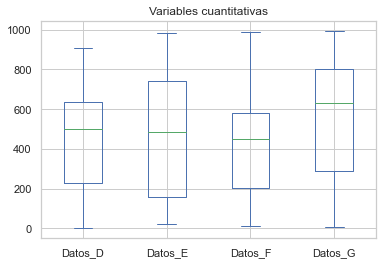

-------------- Graficas de bigotes por dicotomicas-------------------


<Figure size 504x504 with 0 Axes>

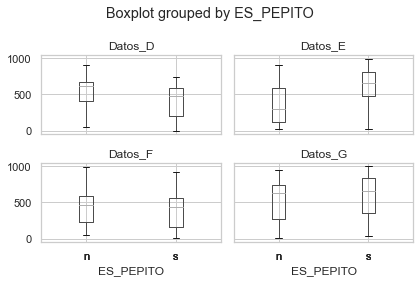

<Figure size 504x504 with 0 Axes>

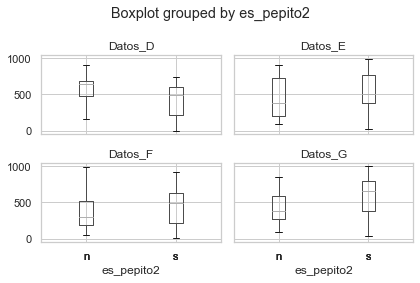

<Figure size 504x504 with 0 Axes>

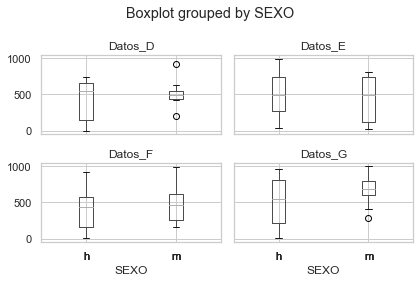

<Figure size 504x504 with 0 Axes>

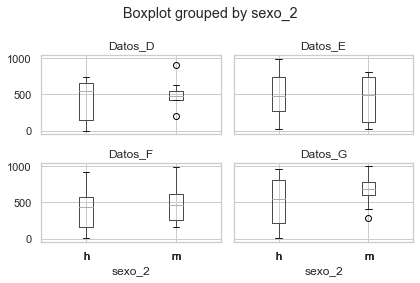



----------------------------------------------------------------------------------------------------

-------------- Graficas de bigotes por categoricas-------------------


<Figure size 504x504 with 0 Axes>

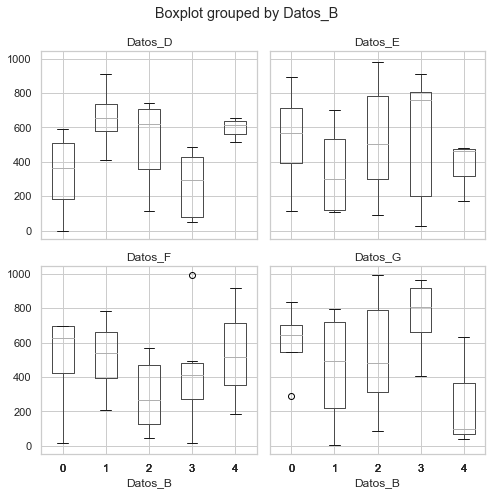

<Figure size 504x504 with 0 Axes>

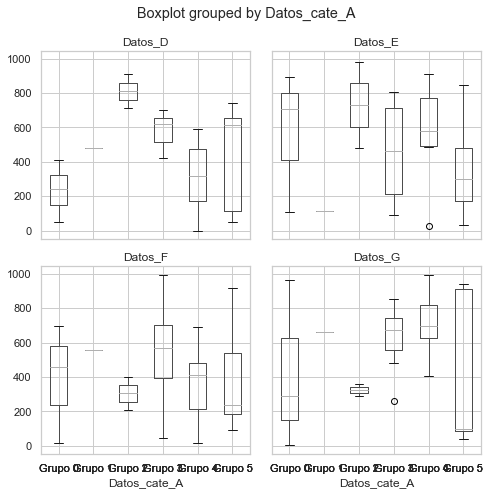

<Figure size 504x504 with 0 Axes>

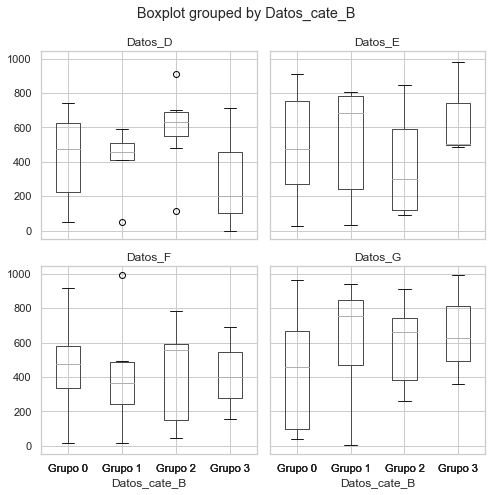

<Figure size 504x504 with 0 Axes>

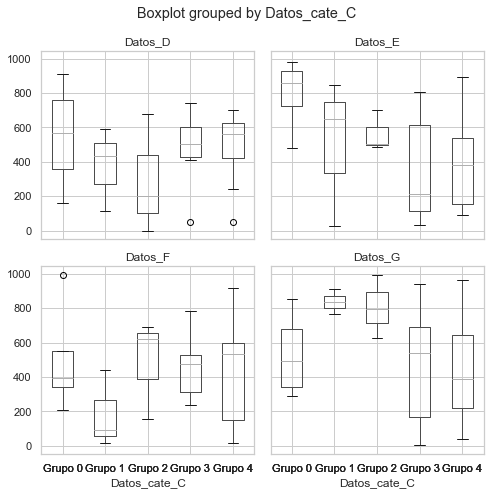



----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------

-------------- MATRIZ DE CORRELACIONES ENTRE CUANTITATIVAS -------------------



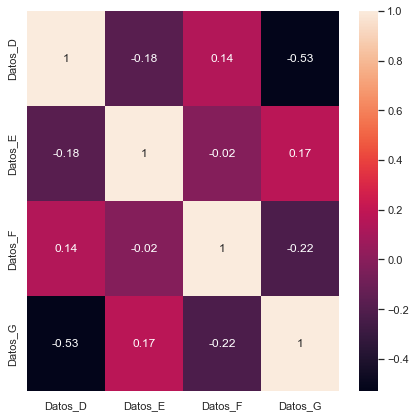

----------------------------------------------------------------------------------------------------

-------------- GRAFICA DE BARRAS DE TODAS LAS CUANTITATIVAS -------------------



<Figure size 1080x1440 with 0 Axes>

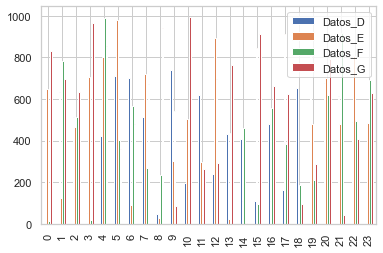

-------------- GRAFICA DE BARRAS CON DISTRIBUCIÓN DE DENSIDAD DE CADA CUANTITATIVA  -------------------


.............. GRAFICA DE BARRAS  DE Datos_D ............



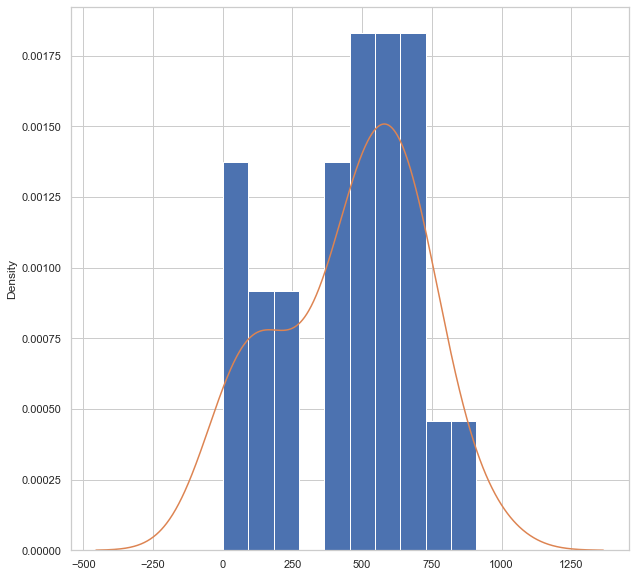


.............. GRAFICA DE BARRAS  DE Datos_E ............



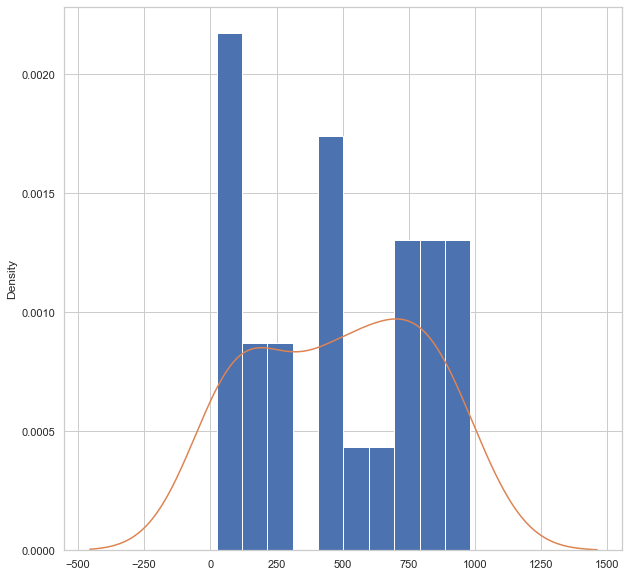


.............. GRAFICA DE BARRAS  DE Datos_F ............



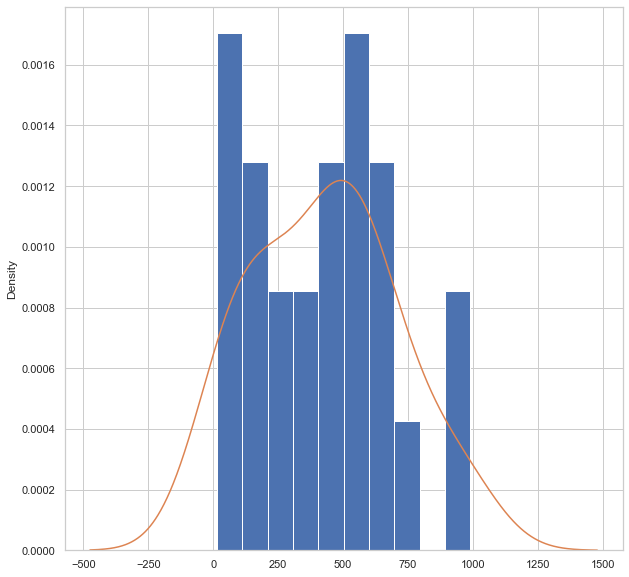


.............. GRAFICA DE BARRAS  DE Datos_G ............



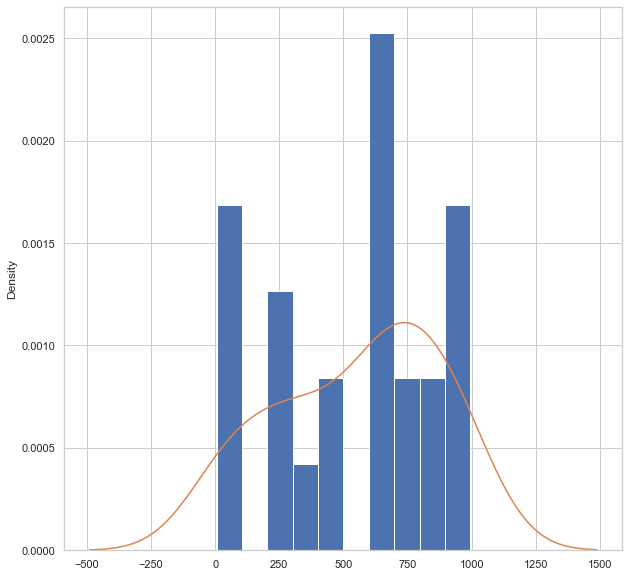

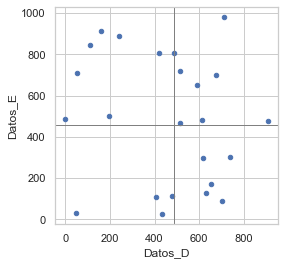

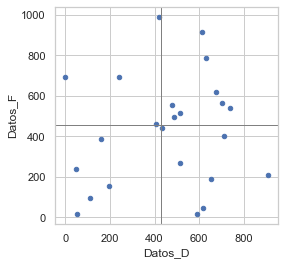


----------------------------------------------------------------------------------------------------

-------------- GRAFICA DE VIONINES  -------------------



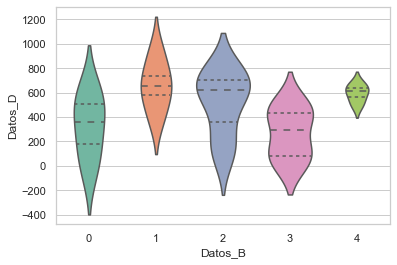

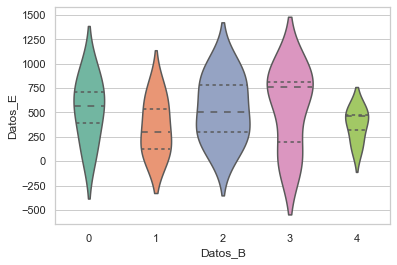

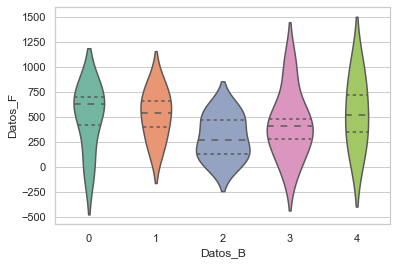

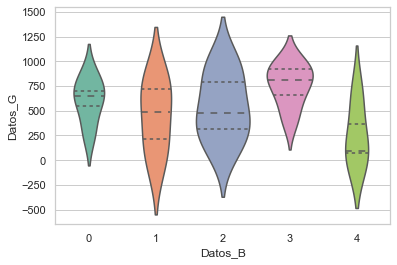

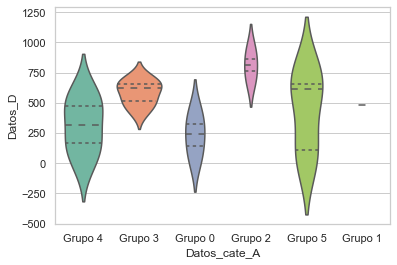

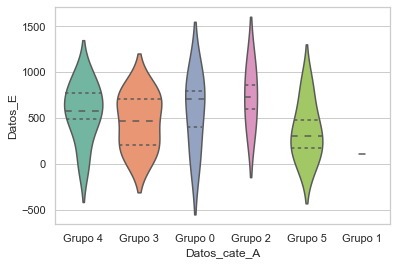

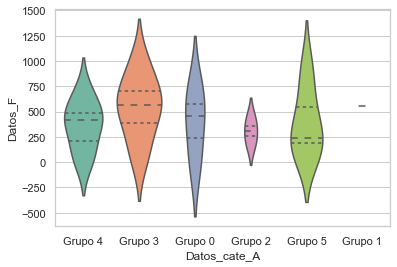

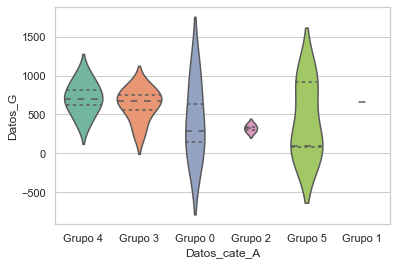

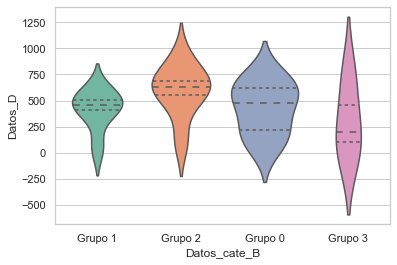

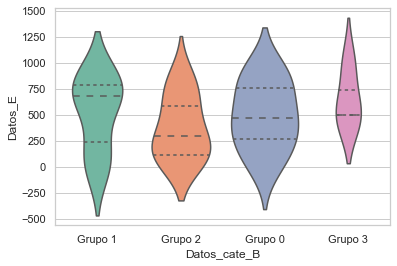

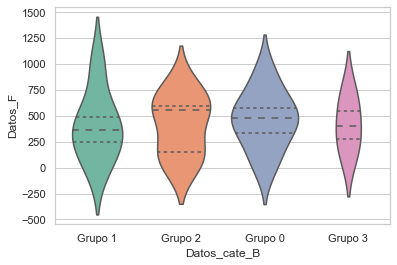

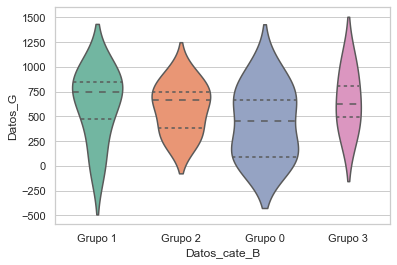

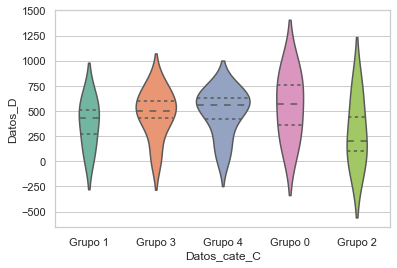

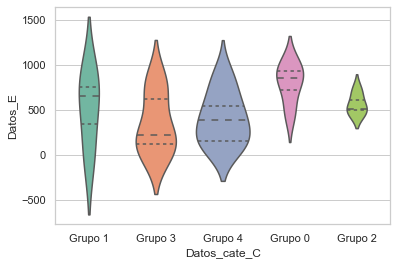

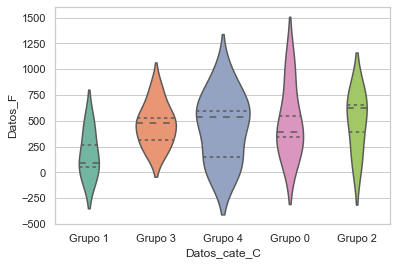

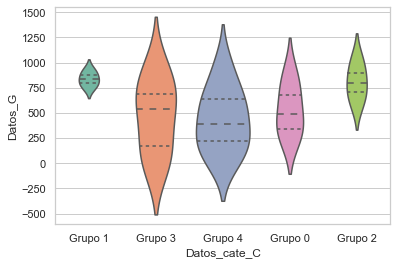


/////////-------------- GRAFICA DE VIONINES POR DICOTOMICAS -------------------/////////////



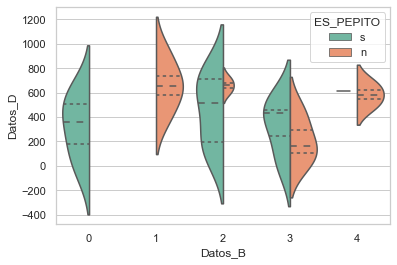

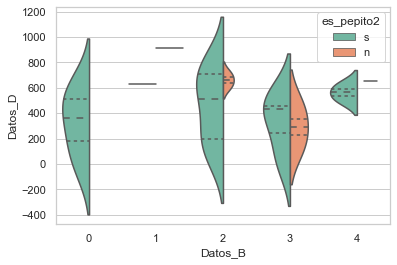

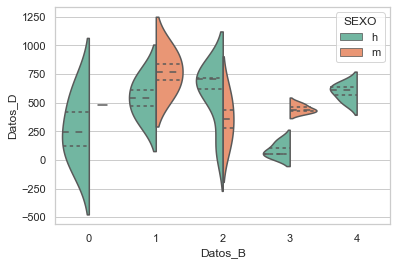

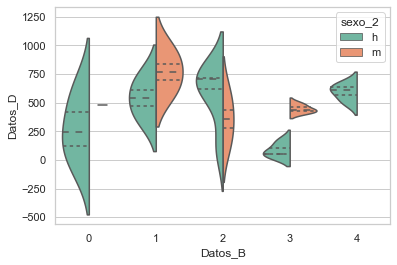

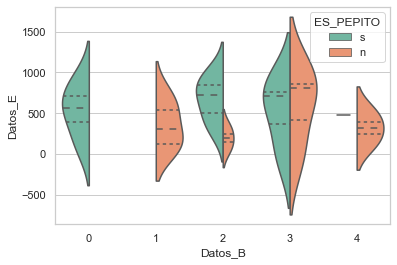

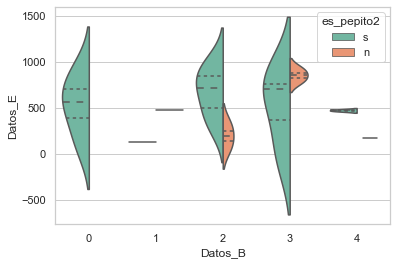

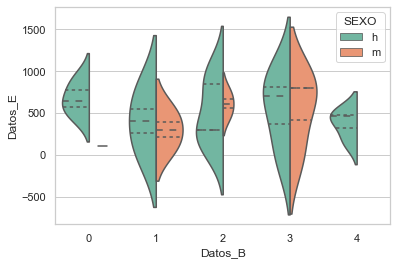

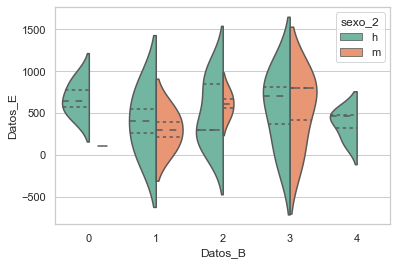

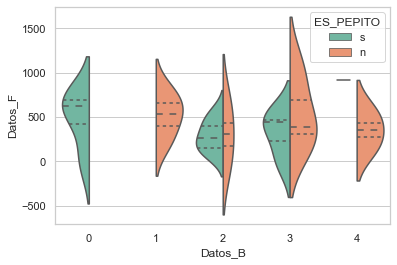

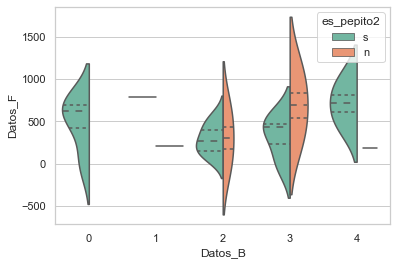

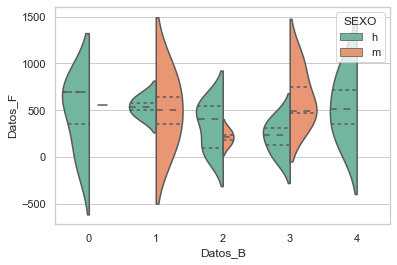

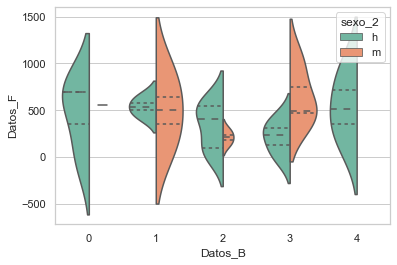

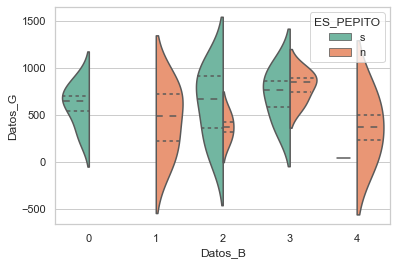

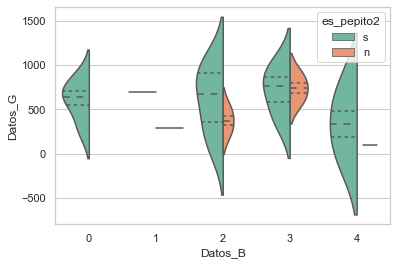

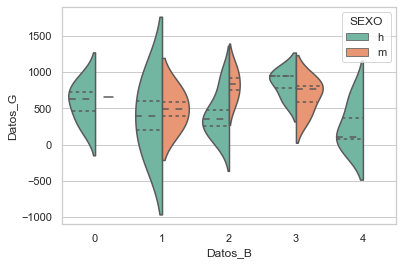

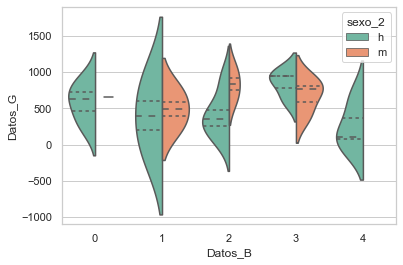

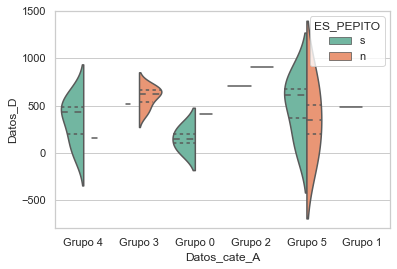

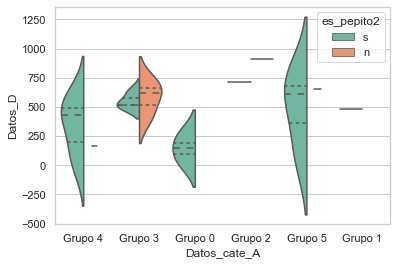

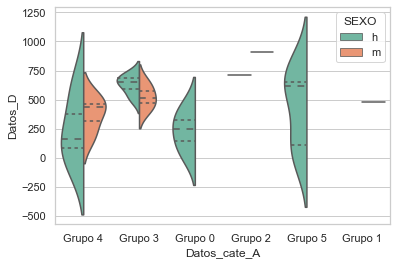

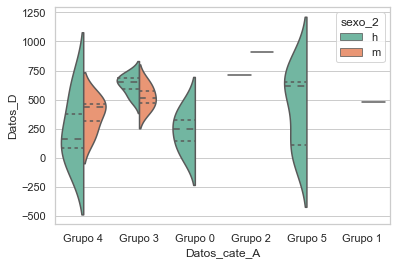

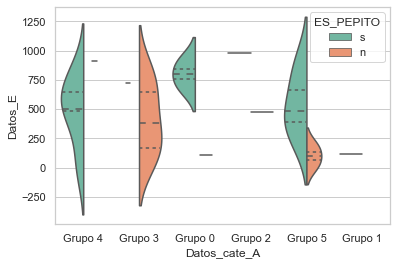

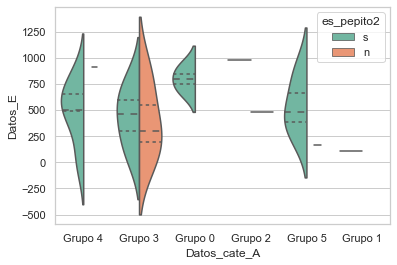

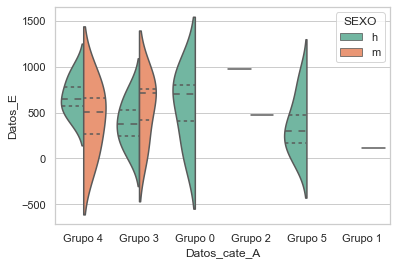

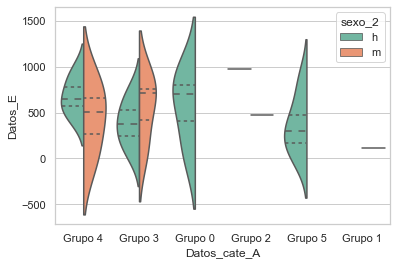

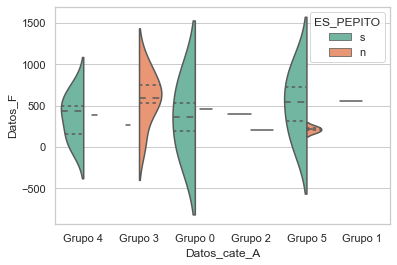

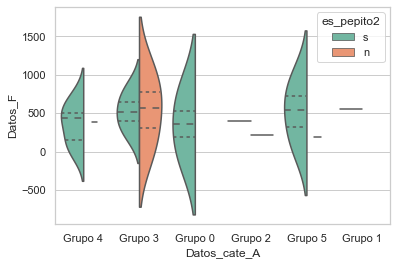

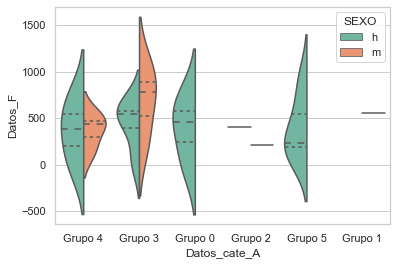

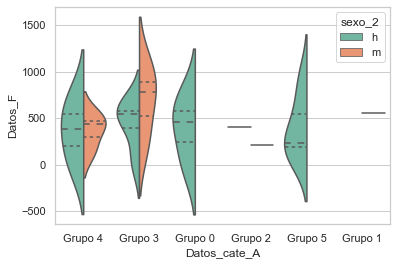

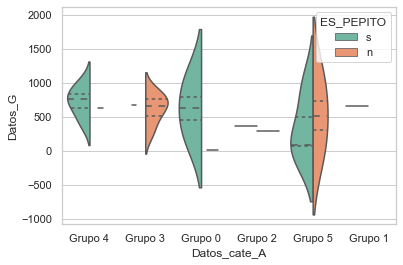

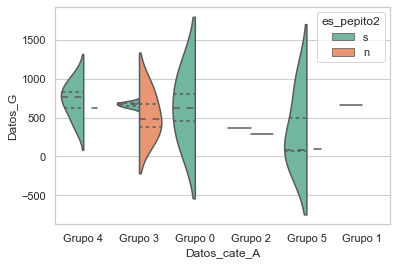

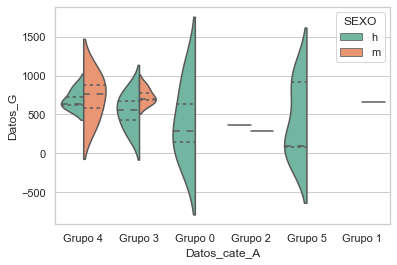

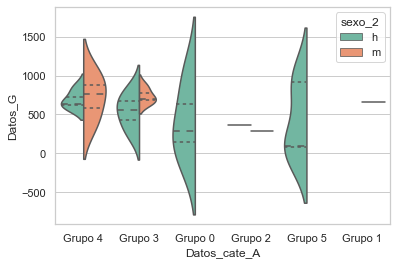

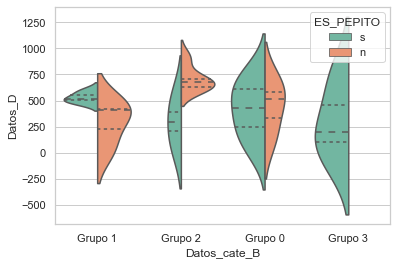

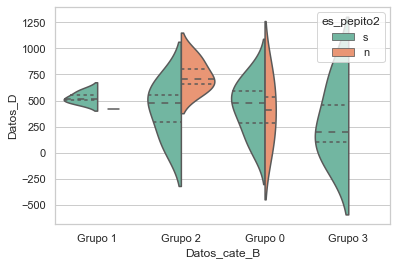

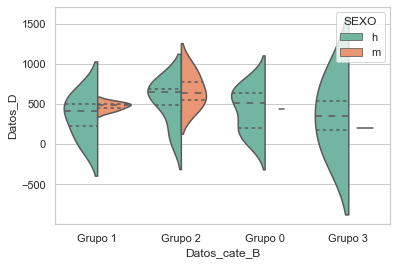

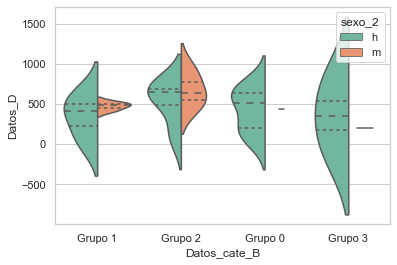

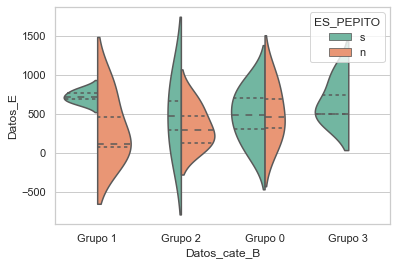

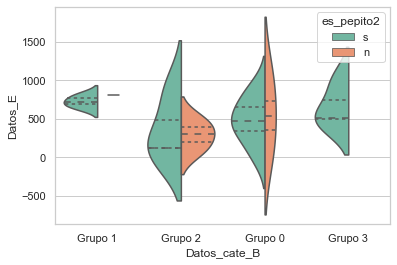

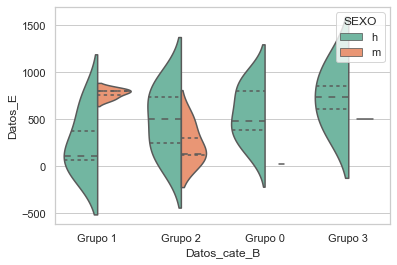

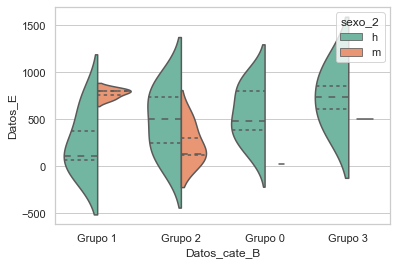

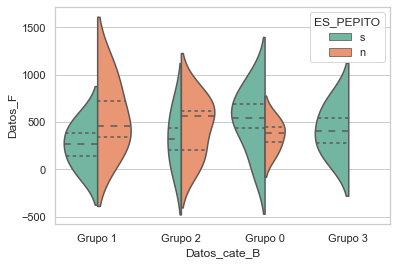

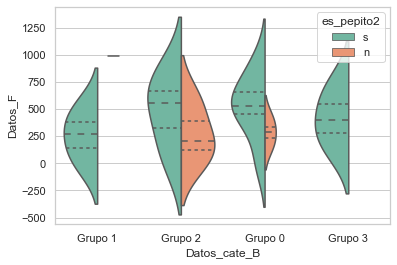

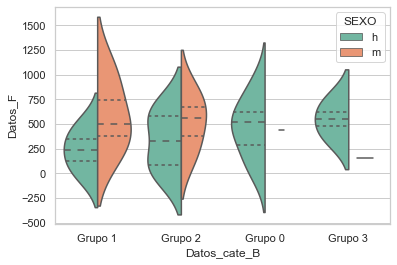

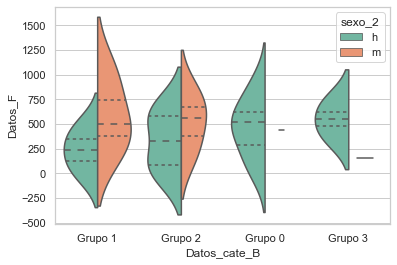

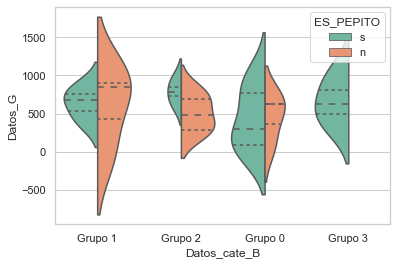

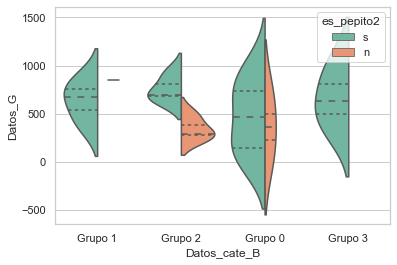

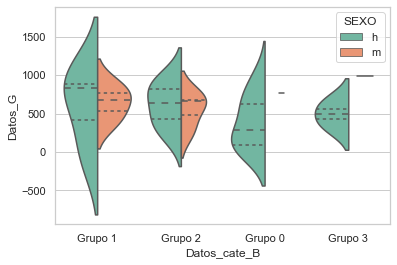

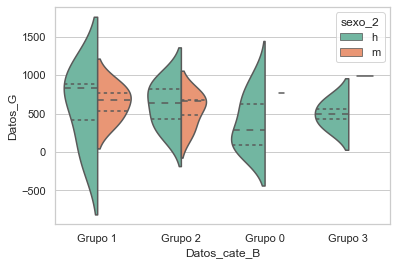

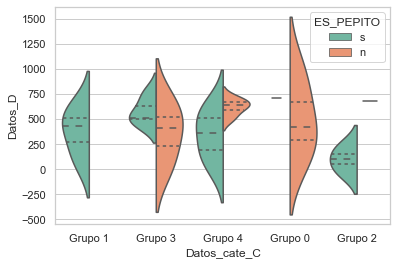

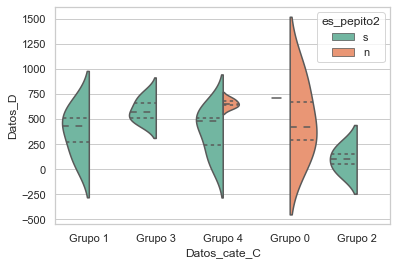

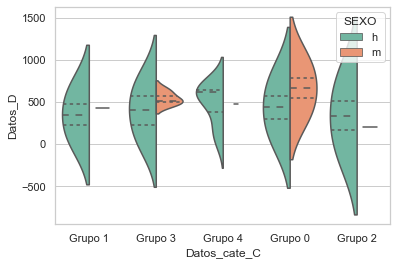

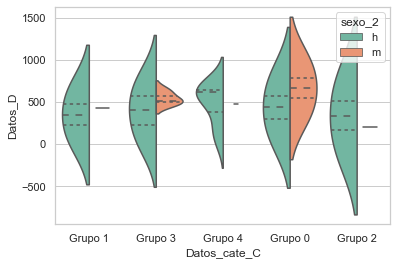

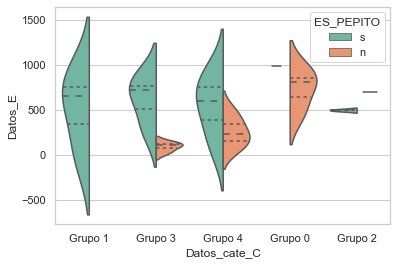

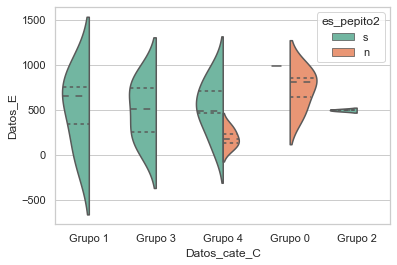

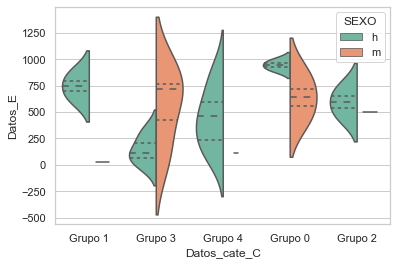

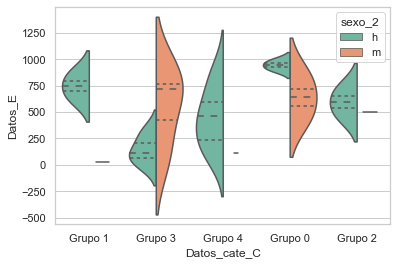

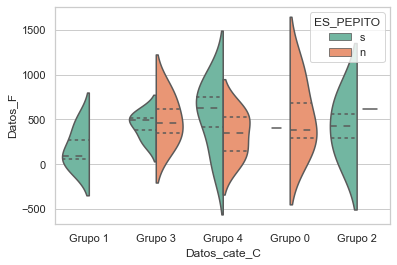

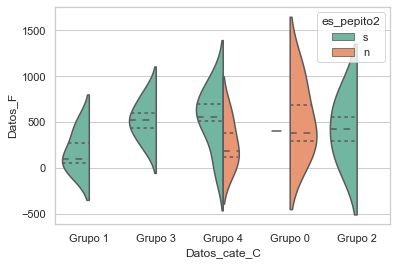

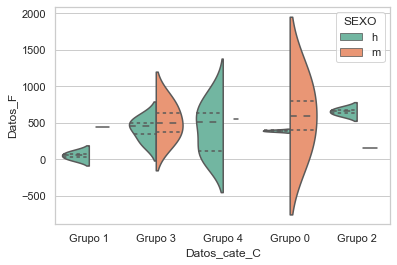

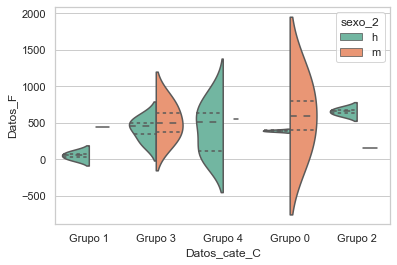

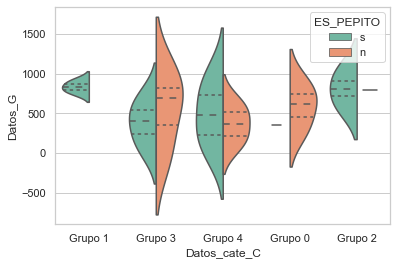

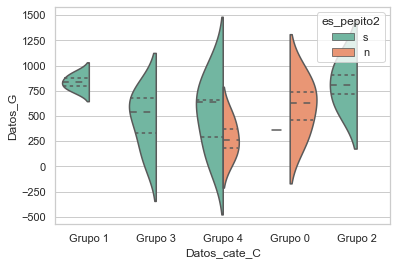

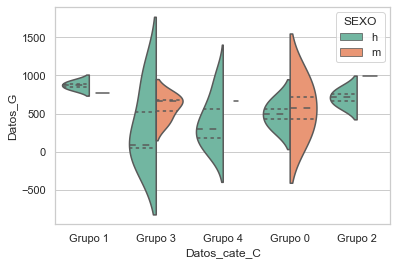

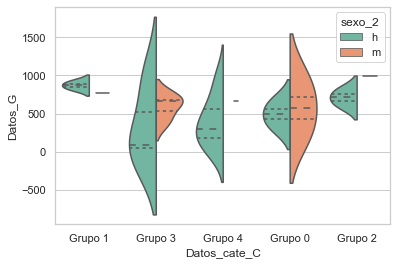

In [126]:
ejemplo.plots()

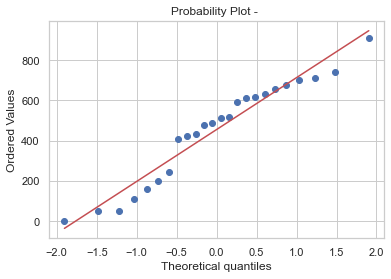

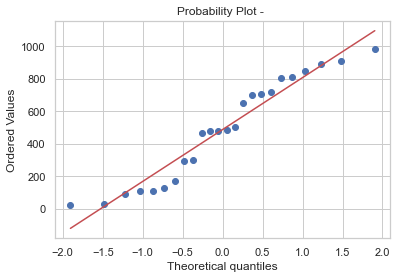

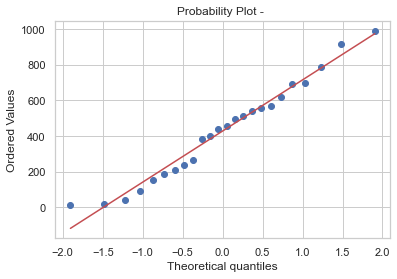

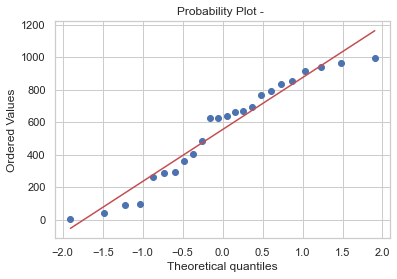

In [127]:
ejemplo.plot_normailidad()

# TEST ESTADISTICOS

## Variables normales y no normales

## Chi2

In [128]:
ejemplo.Chi()


-------------- Chi2 entre ES_PEPITO y es_pepito2 ----------------
p: 0.00022024132045215684 


-------------- Chi2 entre ES_PEPITO y SEXO ----------------
p: 0.5623426051791449 


-------------- Chi2 entre ES_PEPITO y sexo_2 ----------------
p: 0.5623426051791449 


-------------- Chi2 entre es_pepito2 y SEXO ----------------
p: 0.7762576671816586 


-------------- Chi2 entre es_pepito2 y sexo_2 ----------------
p: 0.7762576671816586 


-------------- Chi2 entre SEXO y sexo_2 ----------------
p: 9.63357008643095e-07 



## T_student

# Wilconxon

## Anova

In [129]:
ejemplo.anova()


----------- ANOVA Categoria Datos_B y variable continua Datos_D ----------

                sum_sq    df         F    PR(>F)
Datos_B   2.084474e+02   1.0  0.003121  0.955956
Residual  1.469535e+06  22.0       NaN       NaN

----------- ANOVA Categoria Datos_B y variable continua Datos_E ----------

                sum_sq    df         F    PR(>F)
Datos_B   8.526316e+02   1.0  0.008297  0.928245
Residual  2.260700e+06  22.0       NaN       NaN

----------- ANOVA Categoria Datos_B y variable continua Datos_F ----------

                sum_sq    df         F    PR(>F)
Datos_B   9.500000e+02   1.0  0.011841  0.914336
Residual  1.765123e+06  22.0       NaN       NaN

----------- ANOVA Categoria Datos_B y variable continua Datos_G ----------

                sum_sq    df         F    PR(>F)
Datos_B   6.764447e+03   1.0  0.066289  0.799212
Residual  2.244985e+06  22.0       NaN       NaN

----------- ANOVA Categoria Datos_cate_A y variable continua Datos_D ----------

                     s

In [130]:
# # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
# fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
# print(fvalue, pvalue)
# # 17.492810457516338 2.639241146210922e-05

# # get ANOVA table as R like output
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# # Ordinary Least Squares (OLS) model
# model = ols('value ~ C(treatments)', data=df_melt).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table
# # output (ANOVA F and p value)
#                 sum_sq    df         F    PR(>F)
# C(treatments)  3010.95   3.0  17.49281  0.000026
# Residual        918.00  16.0       NaN       NaN

# # ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
# from bioinfokit.analys import stat
# res = stat()
# res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
# res.anova_summary
# # output (ANOVA F and p value)
#                  df   sum_sq   mean_sq         F    PR(>F)
# C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
# Residual       16.0   918.00    57.375       NaN       NaN

# # note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# # (typ parameter) will produce similar results.

In [131]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
#  
# for x in categorical_col:
#     model = ols('cnt' + '~' + x, data = BIKE).fit() #Oridnary least square method
#     result_anova = sm.stats.anova_lm(model) # ANOVA Test
#     print(result_anova)

In [132]:
# array1=["a","b","c"]
# array2=["d","e","f","g"]
# array3=["g"]

# def combinatoria(lista):
#     if len(lista)>2:
#         for ind, i in enumerate(lista):
#             for j in range(ind+1,len(lista)):
#                 print(f"i es : {i}")
#                 print(f"j es : {lista[j]}\n")
#     else:
#         print("******************** No suficientes argumentos ********************")
# combinatoria(array3)
